In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.data.shape

#shows that there are 1797 images (8 by 8 images of dimensionality 64)

(1797, 64)

In [4]:
digits.target.shape

#shows that there are 1797 labels (integers from 0-9)

(1797,)

In [7]:
digits.data[7]

array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

In [8]:
digits.target[7]

7

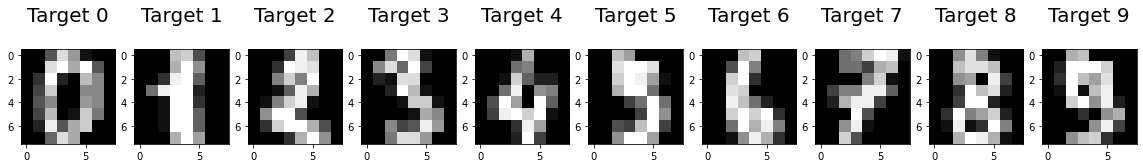

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Target %i\n' % label, fontsize = 20)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression( C=10, solver='saga', max_iter = 300, random_state =12, tol =0.001, multi_class ='auto')

In [19]:
clf.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=300, random_state=12, solver='saga',
                   tol=0.001)

In [20]:
clf.n_iter_

array([266])

In [22]:
#Predicting for one observation (image)
clf.predict(x_test[0].reshape(1,-1))

array([2])

In [24]:
#Predict for multiple observations (images) at once
clf.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [27]:
#Predict for the entire test data
predictions = clf.predict(x_test)
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [28]:
#Performance metrices
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.96


In [29]:
# Using score method to calculate accuracy of the model
score = clf.score(x_train, y_train)
print(score)

1.0


In [30]:
import numpy as np
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn import metrics

In [31]:
print(f1_score(y_test, predictions, average='macro'))

0.9607023735651516


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.95      0.93        43
           2       0.98      0.95      0.97        44
           3       0.93      0.96      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.94      0.92      0.93        48
           9       0.92      0.96      0.94        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [35]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 42,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

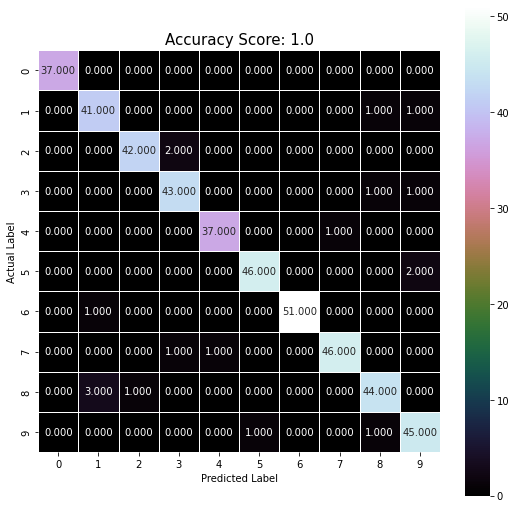

In [40]:
plt.figure(figsize =(9,9))
sns.heatmap(cm, annot =True, fmt =".3f", linewidth = 0.5, square =True, cmap ='cubehelix');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('Digits_ConfusionMatrix.png')
plt.show()

In [37]:
clf.coef_

array([[ 0.00000000e+00, -3.34068832e-03, -3.65635621e-02,
         8.74693209e-02,  2.49045453e-02, -1.15199252e-01,
        -1.01397345e-01, -1.14674370e-02, -1.05208918e-04,
        -1.87877551e-02, -1.52849306e-02,  1.27092343e-01,
         6.28542935e-02,  7.62535183e-02, -4.90601348e-02,
        -1.01507158e-02, -1.59717380e-06,  5.26914171e-02,
         1.21136515e-01, -2.21093656e-02, -2.68264505e-01,
         1.67200943e-01,  6.94325585e-02, -2.29894451e-03,
        -1.58112493e-06,  8.52938402e-02,  1.09151510e-01,
        -1.40693235e-01, -4.04929296e-01,  1.85105815e-02,
         9.30144500e-02, -3.21452251e-04,  0.00000000e+00,
         1.01913916e-01,  1.01687627e-01, -1.37081097e-01,
        -3.07594052e-01,  2.35188519e-02,  6.19468872e-02,
         0.00000000e+00, -7.33708885e-04, -3.08979016e-02,
         1.89134417e-01, -8.44814275e-02, -1.42923256e-01,
         8.80372581e-02,  3.32189536e-02, -2.98873242e-04,
        -2.63358139e-03, -7.47014331e-02,  5.83000792e-0

In [38]:
clf.intercept_

array([ 0.00061527, -0.03932345,  0.00180298,  0.0043618 ,  0.02769183,
        0.0015207 , -0.00252165,  0.00584037,  0.01703716, -0.017025  ])

In [39]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])